In [ ]:
# STEP 1: Install necessary versions
!pip install jax==0.4.18 jaxlib==0.4.18 numpyro==0.9.2 lightweight_mmm==0.1.9 --quiet
!pip install scipy==1.11.4 --quiet





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.9/283.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.2/105.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 kB 9.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbax-checkpoint 0.11.13 requires jax>=0.5.0, but you have jax 0.4.18 which is incompatible.
bigframes 2.4.0 requires matplotlib>=3.7.1, but you have matplotlib 3.6.1 which is incompatible.
chex 0.1.89 requires jax>=0.4.27, but you have jax 0.4.18 which is incompatible.
chex 0.1.89 requires jaxlib>=0.4.27, but you have jaxlib 0.4.18 which is incompa

ValueError: mount failed

In [ ]:
!pip install --upgrade pip
!pip install numpy==1.26.4
!pip install jax==0.4.23 jaxlib==0.4.23
!pip install scipy==1.11.4
!pip install lightweight-mmm==0.1.9


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 MB 50.5 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.18
    Uninstalling jaxlib-0.4.18:
      Successfully uninstalled jaxlib-0.4.18
  Attempting uninstall: jax
    Found existing installation: jax 0.4.18
    Uninstalling jax-0.4.18:
      Successfully uninstalled jax-0.4.18
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [jax]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbax-checkpoint 0.11.13 requires jax>=0.5.0, but you have jax 0.4.23 which is incompatible.
chex

In [ ]:
# STEP 2: Mount and read your data
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/My Drive/project 2 MMM/cleaned_with_spend.csv'
df = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# STEP 3: Preprocess
df['calendar_week'] = pd.to_datetime(df['calendar_week'])
df = df.sort_values('calendar_week')
df.set_index('calendar_week', inplace=True)

# STEP 4: Define media and normalize
media = ['spend_google', 'spend_email', 'spend_facebook', 'spend_affiliate']
target = 'sales'
df[media] = df[media].div(df[media].max())


In [ ]:
# STEP 5: Fit the model
import jax.numpy as jnp
from lightweight_mmm import lightweight_mmm

media_data = df[media].values
target_data = df[target].values
media_prior = jnp.array([0.5] * len(media))

mmm = lightweight_mmm.LightweightMMM(model_name="carryover")
mmm.fit(
    media=media_data,
    media_prior=media_prior,
    target=target_data,
    number_warmup=500,
    number_samples=1000,
    seed=123
)

ERROR:jax._src.xla_bridge:Jax plugin configuration error: Plugin module %s could not be loaded
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/xla_bridge.py", line 457, in discover_pjrt_plugins
    plugin_module = importlib.import_module(plugin_module_name)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_r

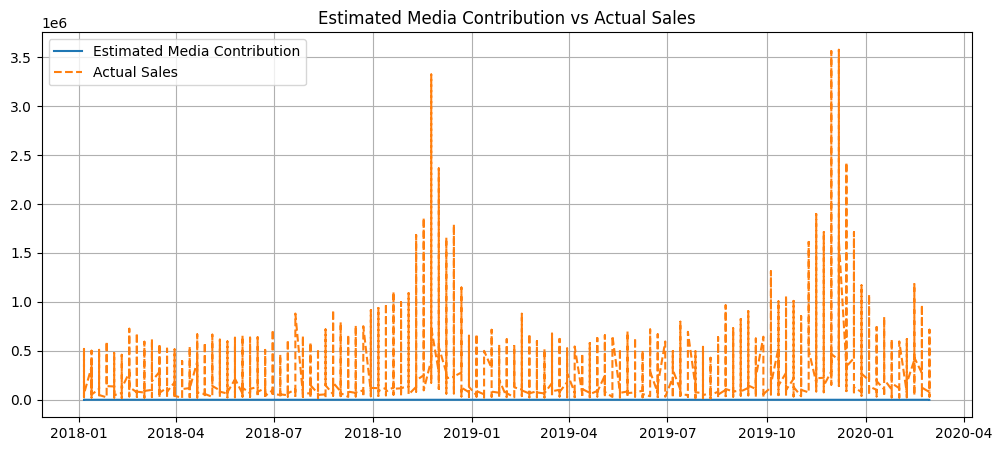

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df.index, mean_contributions, label="Estimated Media Contribution")
plt.plot(df.index, df[target], label="Actual Sales", linestyle="--")
plt.legend()
plt.title("Estimated Media Contribution vs Actual Sales")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np  # ← Add this line first!

# Step 1: Add seasonality & controls to your DataFrame
df["week"] = np.arange(len(df))
df["sin_52"] = np.sin(2 * np.pi * df["week"] / 52)
df["cos_52"] = np.cos(2 * np.pi * df["week"] / 52)


In [ ]:
# Step 2: Define your columns
media = ['spend_google', 'spend_email', 'spend_facebook', 'spend_affiliate']
extra = ['organic_views', 'paid_views', 'sin_52', 'cos_52']
target = 'sales'

In [ ]:
# Step 3: Normalize media
df[media] = df[media].div(df[media].max())


In [ ]:
# Step 4: Prepare data
import jax.numpy as jnp
media_data = df[media].values
extra_data = df[extra].values
target_data = df[target].values
media_prior = jnp.array([0.5] * len(media))

In [ ]:
# Step 5: Fit the model with extra features
from lightweight_mmm import lightweight_mmm

mmm = lightweight_mmm.LightweightMMM(model_name="carryover")
mmm.fit(
    media=media_data,
    media_prior=media_prior,
    extra_features=extra_data,
    target=target_data,
    number_warmup=500,
    number_samples=1000,
    seed=123
)

/usr/local/lib/python3.11/dist-packages/lightweight_mmm/lightweight_mmm.py:358: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = numpyro.infer.MCMC(
sample: 100%|██████████| 1500/1500 [03:31<00:00,  7.09it/s, 31 steps of size 1.50e-01. acc. prob=0.94]


In [ ]:
posterior_pred = mmm.predict(media=media_data, extra_features=extra_data)
mean_pred = posterior_pred.mean(axis=0)


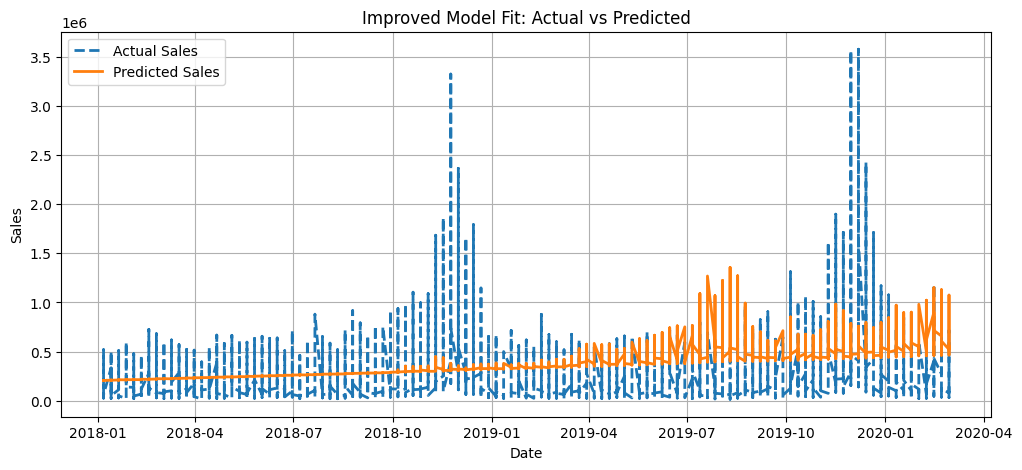

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df.index, df[target], label="Actual Sales", linestyle="--", linewidth=2)
plt.plot(df.index, mean_pred, label="Predicted Sales", linewidth=2)
plt.title("Improved Model Fit: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


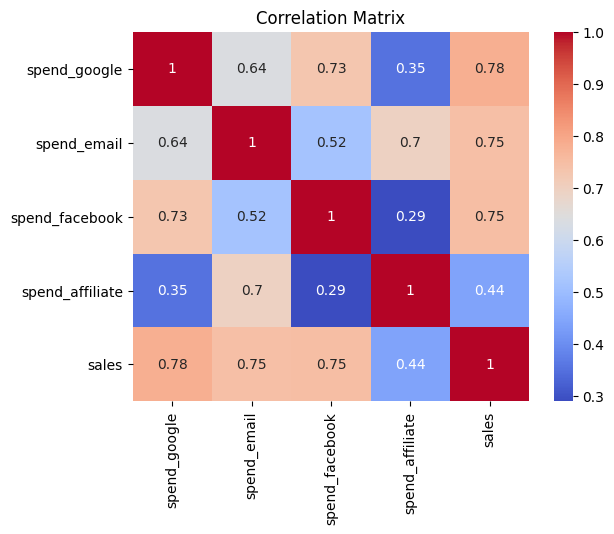

In [ ]:
import seaborn as sns
corr_matrix = df[media + [target]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


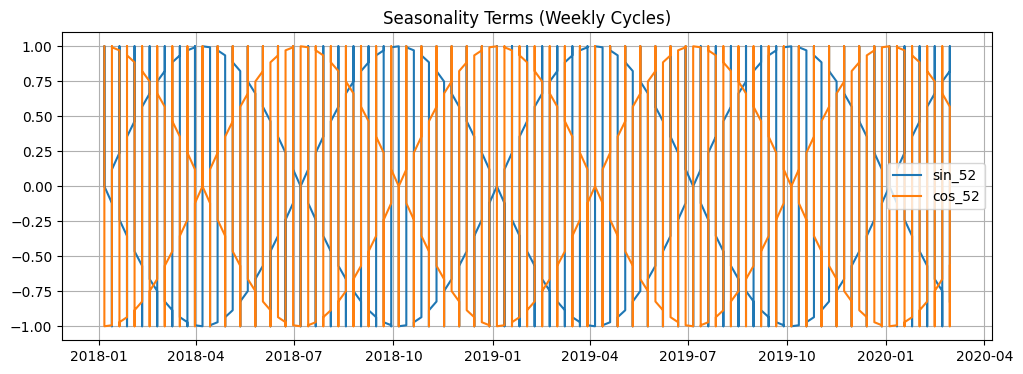

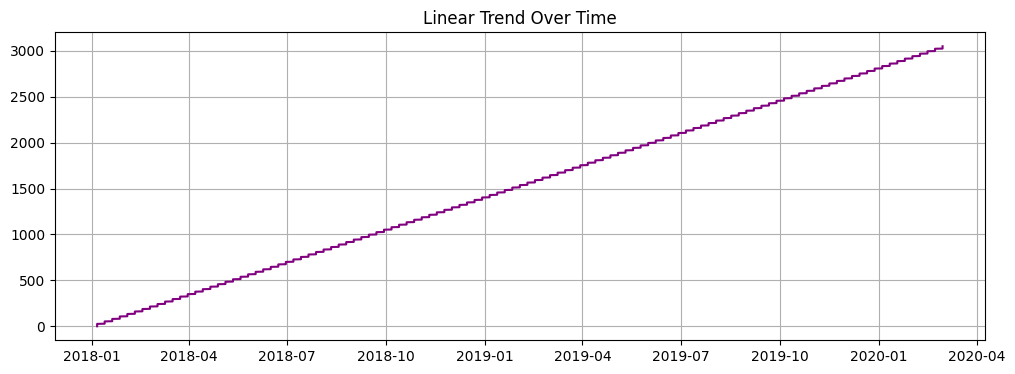

In [ ]:
# Visualize Fourier Seasonality Terms
plt.figure(figsize=(12,4))
plt.plot(df.index, df["sin_52"], label="sin_52")
plt.plot(df.index, df["cos_52"], label="cos_52")
plt.title("Seasonality Terms (Weekly Cycles)")
plt.legend()
plt.grid(True)
plt.show()

df["week"] = np.arange(len(df))
df["trend"] = df["week"]

# Visualize Linear Trend
plt.figure(figsize=(12,4))
plt.plot(df.index, df["trend"], label="Trend", color='purple')
plt.title("Linear Trend Over Time")
plt.grid(True)
plt.show()


In [ ]:
df["month"] = df.index.month


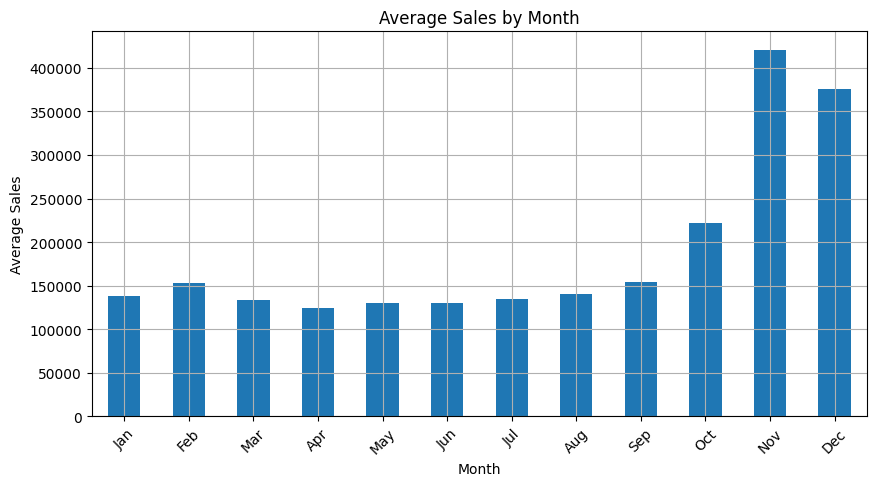

In [ ]:
monthly_avg = df.groupby("month")["sales"].mean()

monthly_avg.plot(kind="bar", figsize=(10,5))
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.grid(True)
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


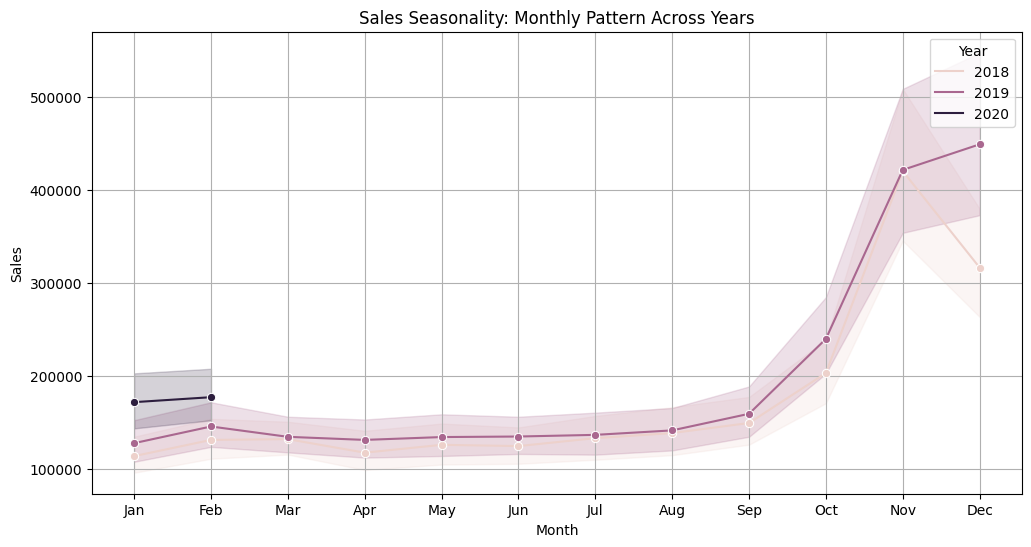

In [ ]:
import seaborn as sns

# Add year for grouping
df["year"] = df.index.year

# Plot each year's monthly sales on the same graph
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="month", y="sales", hue="year", marker="o")
plt.title("Sales Seasonality: Monthly Pattern Across Years")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.xticks(range(1,13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                         "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")
plt.show()


In [ ]:
from scipy.stats import f_oneway

# Create a list of sales for each month
month_sales = [df[df["month"] == m]["sales"] for m in range(1, 13)]

# Run ANOVA
f_stat, p_val = f_oneway(*month_sales)

print("F-statistic:", round(f_stat, 2))
print("P-value:", round(p_val, 6))

if p_val < 0.05:
    print("✅ Result: Monthly seasonality has a significant impact on sales.")
else:
    print("❌ Result: No statistically significant monthly seasonality found.")


F-statistic: 56.38
P-value: 0.0
✅ Result: Monthly seasonality has a significant impact on sales.


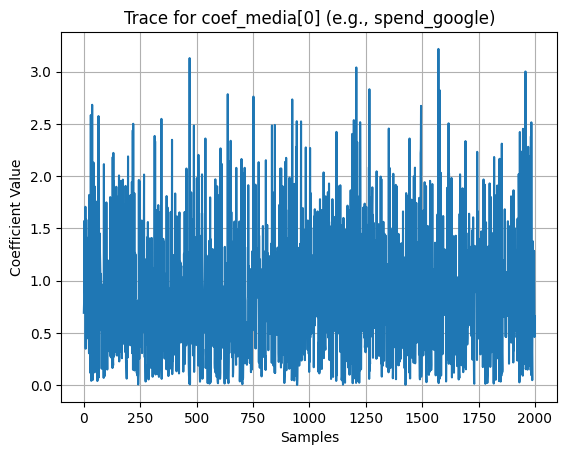

In [ ]:
import matplotlib.pyplot as plt

# Pick one channel
plt.plot(mmm.trace['coef_media'][:, 0])
plt.title("Trace for coef_media[0] (e.g., spend_google)")
plt.xlabel("Samples")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()


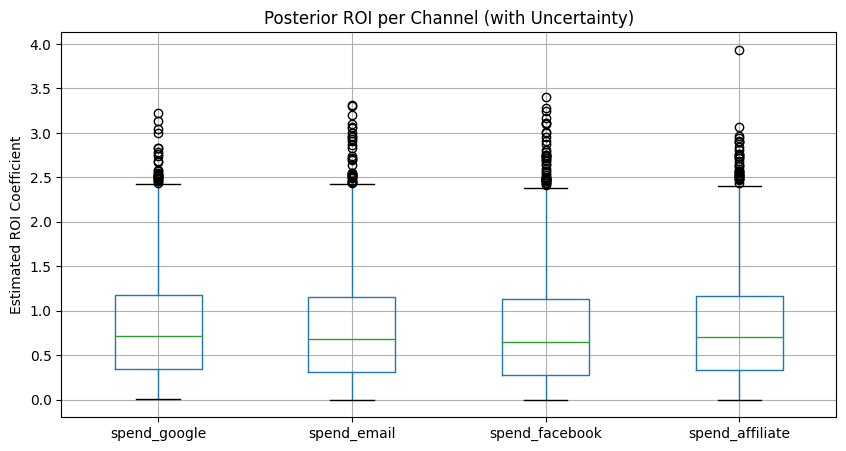

In [ ]:
media_coefs = mmm.trace["coef_media"]
roi_df = pd.DataFrame(media_coefs, columns=media)

plt.figure(figsize=(10,5))
roi_df.boxplot()
plt.title("Posterior ROI per Channel (with Uncertainty)")
plt.ylabel("Estimated ROI Coefficient")
plt.grid(True)
plt.show()


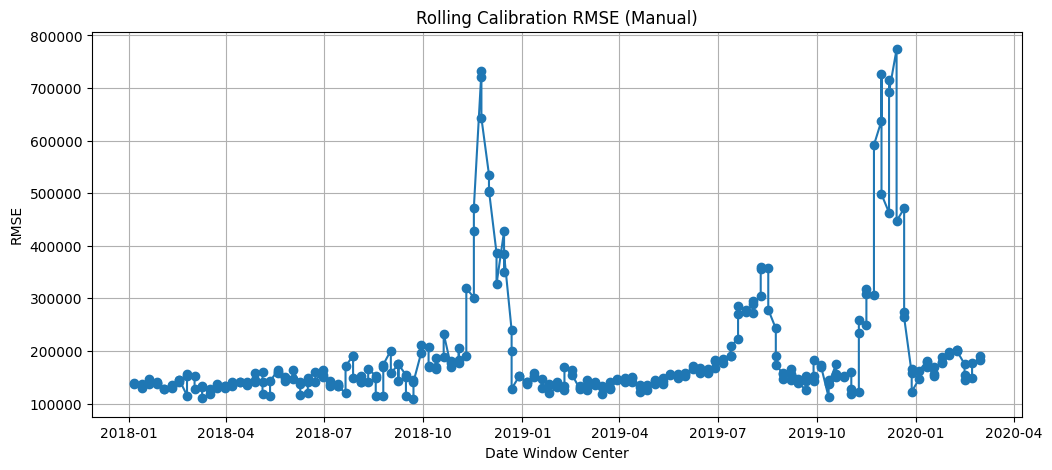

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

window_size = 30
stride = 10
rmses = []
dates = []

for start in range(0, len(df) - window_size, stride):
    end = start + window_size

    media_subset = media_data[start:end]
    extra_subset = extra_data[start:end]
    target_subset = target_data[start:end]

    preds = mmm.predict(media=media_subset, extra_features=extra_subset).mean(axis=0)
    rmse = np.sqrt(mean_squared_error(target_subset, preds))
    rmses.append(rmse)
    dates.append(df.index[start + window_size // 2])

# Plot results
plt.figure(figsize=(12,5))
plt.plot(dates, rmses, marker="o")
plt.title("Rolling Calibration RMSE (Manual)")
plt.xlabel("Date Window Center")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()



trying to optimize the model:

In [ ]:
# STEP 1: Refresh Inputs
import numpy as np
import jax.numpy as jnp
from lightweight_mmm import lightweight_mmm
import matplotlib.pyplot as plt
import pandas as pd

# Optional: Add interaction term
df["email_paid_interaction"] = df["spend_email"] * df["paid_views"]

media = ['spend_google', 'spend_email', 'spend_facebook', 'spend_affiliate']
extra = ['trend', 'sin_52', 'cos_52', 'organic_views', 'paid_views', 'email_paid_interaction']
target = 'sales'

# Normalize media again (in case it changed)
df[media] = df[media].div(df[media].max())

# Prepare arrays
media_data = df[media].values
extra_data = df[extra].values
target_data = df[target].values


In [ ]:

# STEP 2: Fit New Model with Saturation & Decay
media_prior = jnp.array([1.0] * len(media))

mmm = lightweight_mmm.LightweightMMM(model_name="hill_adstock")
mmm.fit(
    media=media_data,
    media_prior=media_prior,
    extra_features=extra_data,
    target=target_data,
    number_warmup=500,
    number_samples=1000,
    seed=123
)



/usr/local/lib/python3.11/dist-packages/lightweight_mmm/lightweight_mmm.py:358: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = numpyro.infer.MCMC(
sample: 100%|██████████| 1500/1500 [01:23<00:00, 17.93it/s, 31 steps of size 1.06e-01. acc. prob=0.95]


In [ ]:
# STEP 3: Predict Again
posterior_pred = mmm.predict(media=media_data, extra_features=extra_data)
mean_pred = posterior_pred.mean(axis=0)

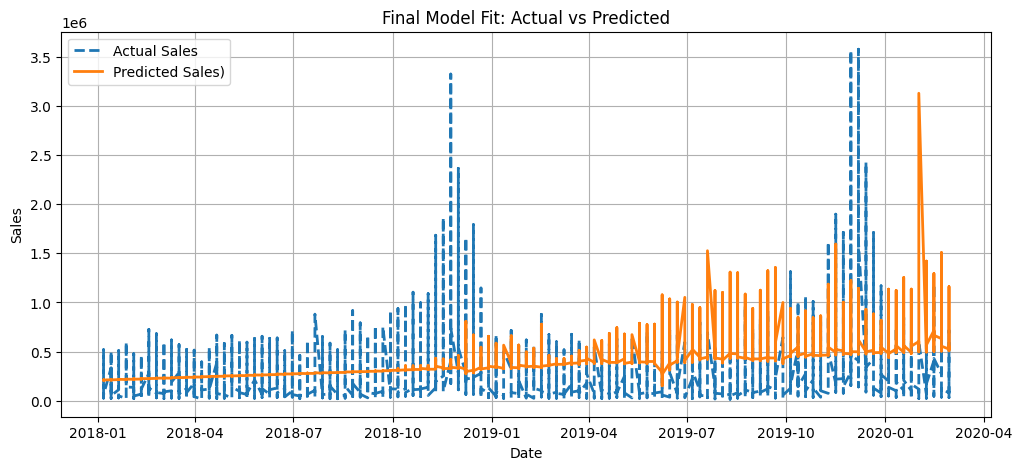

In [ ]:
# STEP 4: Plot Actual vs Predicted
plt.figure(figsize=(12,5))
plt.plot(df.index, df[target], label="Actual Sales", linestyle="--", linewidth=2)
plt.plot(df.index, mean_pred, label="Predicted Sales)", linewidth=2)
plt.title("Final Model Fit: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

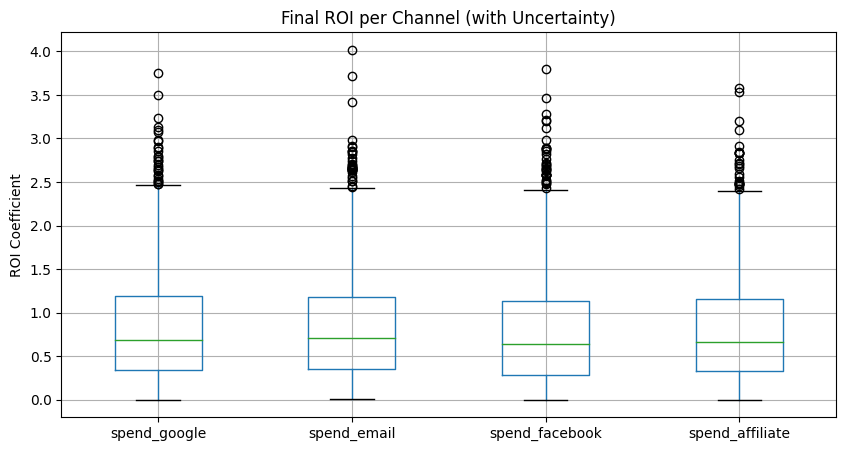

In [ ]:
# STEP 5: ROI Boxplot with Uncertainty
media_coefs = mmm.trace["coef_media"]
roi_df = pd.DataFrame(media_coefs, columns=media)

plt.figure(figsize=(10,5))
roi_df.boxplot()
plt.title("Final ROI per Channel (with Uncertainty)")
plt.ylabel("ROI Coefficient")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from lightweight_mmm import lightweight_mmm

# 1. Full index reset (now 'calendar_week' is a column)
df_reset = df.reset_index()

# 2. Create month dummies from the column, convert to float
month_dummies = pd.get_dummies(df_reset["calendar_week"].dt.month, prefix="month", drop_first=True).astype(float)

# 3. Concatenate month dummies and reset df
df_reset = pd.concat([df_reset, month_dummies], axis=1)

# 4. Set index back to calendar_week
df_reset.set_index("calendar_week", inplace=True)
df = df_reset.copy()

# 5. Define extra feature list
extra = ['trend', 'sin_52', 'cos_52', 'organic_views', 'paid_views', 'email_paid_interaction'] + list(month_dummies.columns)

# 6. Force all extra features to float
df[extra] = df[extra].astype(float)
extra_data = df[extra].values

# 7. Normalize media
media = ['spend_google', 'spend_email', 'spend_facebook', 'spend_affiliate']
df[media] = df[media].div(df[media].max())
media_data = df[media].values
target_data = df['sales'].values


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from lightweight_mmm import lightweight_mmm

# STEP 0.1: Mount Google Drive (if using Colab)
from google.colab import drive
drive.mount('/content/drive')

# STEP 0.2: Load your data
file_path = "/content/drive/My Drive/project 2 MMM/cleaned_with_spend.csv"  # ✅ Replace if needed
df = pd.read_csv(file_path)

# STEP 0.3: Parse dates & sort
df["calendar_week"] = pd.to_datetime(df["calendar_week"])
df = df.sort_values("calendar_week")
df.set_index("calendar_week", inplace=True)

# ✅ Start from here (your code)
# STEP 1: Reset and create month column
df_reset = df.reset_index()
df_reset["month"] = df_reset["calendar_week"].dt.month

# STEP 2: Create month dummies and convert to float (0 or 1)
month_dummies = pd.get_dummies(df_reset["month"], prefix="month", drop_first=True).astype(float)
df_reset = pd.concat([df_reset, month_dummies], axis=1)
df_reset.set_index("calendar_week", inplace=True)
df = df_reset.copy()

# STEP 3: Add Fourier and trend terms, scaled
df["week"] = np.arange(len(df))
df["sin_52"] = (np.sin(2 * np.pi * df["week"] / 52) + 1) / 2  # scale to [0, 1]
df["cos_52"] = (np.cos(2 * np.pi * df["week"] / 52) + 1) / 2
df["trend"] = (df["week"] - df["week"].min()) / (df["week"].max() - df["week"].min())  # scale to [0, 1]

# STEP 4: Define media and all seasonality columns
base_media = ['spend_google', 'spend_email', 'spend_facebook', 'spend_affiliate']
seasonality_terms = list(month_dummies.columns)  # ✅ Use this if testing impact of months
media_all = base_media + seasonality_terms

# STEP 5: Normalize real media to [0, 1]
df[base_media] = df[base_media].div(df[base_media].max())

# STEP 6: Build final media_data matrix and prior
df[media_all] = df[media_all].astype(float)
media_data = df[media_all].values
target_data = df["sales"].values
media_prior = jnp.array([1.0] * media_data.shape[1])

# 🔍 Debug sanity check
print("media_data.shape:", media_data.shape)
print("media_prior.shape:", media_prior.shape)
import statsmodels.api as sm


# Use the same features
X = df[base_media + list(month_dummies.columns)].astype(float)
y = df["sales"]

# Add intercept
X = sm.add_constant(X)

# Fit linear model
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
media_data.shape: (3051, 15)
media_prior.shape: (15,)
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     868.1
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        16:42:34   Log-Likelihood:                -39484.
No. Observations:                3051   AIC:                         7.900e+04
Df Residuals:                    3035   BIC:                         7.910e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef 